In [12]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [13]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(io.BytesIO(requests.get(URL).content), sep=",", encoding="unicode_escape")

In [14]:
data = df[["Rented Bike Count", "Rainfall(mm)", "Temperature(°C)"]].to_numpy().astype(np.float64)
x = data[:, 1:]
y = data[:, 0]
desmat = np.hstack((x, np.ones((x.shape[0], 1))))
beta = np.linalg.lstsq(desmat, y, rcond=None)[0]
pred = desmat @ beta
rsq = np.corrcoef(pred, y)[0, 1]**2

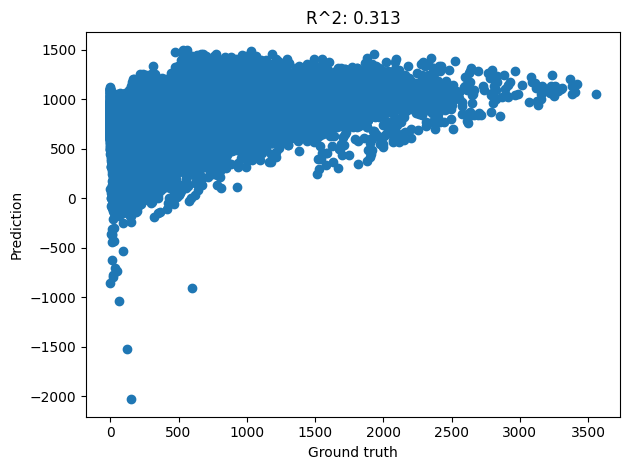

In [15]:
fig, ax = plt.subplots()
ax.set_title(f"R^2: {rsq:.3f}")
ax.set_xlabel("Ground truth")
ax.set_ylabel("Prediction")
ax.scatter(y, pred)
fig.tight_layout()
plt.show()